In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("50_Startups.csv")

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
x = df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [7]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,3]=le.fit_transform(x[:,3])

In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[3])
x = ohe.fit_transform(x).toarray()

C:\Users\WELCOME\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\WELCOME\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [10]:
x = x[:,1:]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
x_train

array([[1.0000000e+00, 0.0000000e+00, 5.5493950e+04, 1.0305749e+05,
        2.1463481e+05],
       [0.0000000e+00, 1.0000000e+00, 4.6014020e+04, 8.5047440e+04,
        2.0551764e+05],
       [1.0000000e+00, 0.0000000e+00, 7.5328870e+04, 1.4413598e+05,
        1.3405007e+05],
       [0.0000000e+00, 0.0000000e+00, 4.6426070e+04, 1.5769392e+05,
        2.1079767e+05],
       [1.0000000e+00, 0.0000000e+00, 9.1749160e+04, 1.1417579e+05,
        2.9491957e+05],
       [1.0000000e+00, 0.0000000e+00, 1.3029813e+05, 1.4553006e+05,
        3.2387668e+05],
       [1.0000000e+00, 0.0000000e+00, 1.1994324e+05, 1.5654742e+05,
        2.5651292e+05],
       [0.0000000e+00, 1.0000000e+00, 1.0002300e+03, 1.2415304e+05,
        1.9039300e+03],
       [0.0000000e+00, 1.0000000e+00, 5.4205000e+02, 5.1743150e+04,
        0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 6.5605480e+04, 1.5303206e+05,
        1.0713838e+05],
       [0.0000000e+00, 1.0000000e+00, 1.1452361e+05, 1.2261684e+05,
        2.61

In [30]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [31]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train , y_train)
y_predict = mlr.predict(x_test)

In [32]:
y_predict

array([103015.20159796, 132582.27760815, 132447.73845175,  71976.09851258,
       178537.48221056, 116161.24230166,  67851.69209676,  98791.73374687,
       113969.43533013, 167921.06569551])

In [33]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [37]:
comp=pd.DataFrame()

In [39]:
comp["y_predict"] = pd.Series(y_predict)

In [42]:
comp['y_test']=pd.Series(y_test)

In [47]:
comp

,y_redict,y_test
0,103015.201598,103282.38
1,132582.277608,144259.40
2,132447.738452,146121.95
3,71976.098513,77798.83
4,178537.482211,191050.39
5,116161.242302,105008.31
6,67851.692097,81229.06
7,98791.733747,97483.56
8,113969.435330,110352.25
9,167921.065696,166187.94


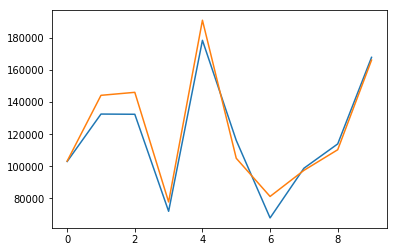

In [48]:
plt.plot(comp)

##backward elimination


In [53]:
len(x)

50

In [90]:
x=np.append(np.ones((50,1)).astype(int),x,axis=1)

In [91]:
x

array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [110]:
from statsmodels.formula.api import OLS
optimal_matrix = x[:,[0,1,2,3,4,5]]


In [111]:
OLS_obj = OLS(endog=y,exog=optimal_matrix).fit()

In [112]:
OLS_obj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.34e-27
Time:                        22:29:47   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
optimal_matrix = x[:,[0,1,3,4,5]]

OLS_obj = OLS(endog=y,exog=optimal_matrix).fit()

OLS_obj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           8.49e-29
Time:                        22:30:25   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
optimal_matrix = x[:,[0,3,4,5]]

OLS_obj = OLS(endog=y,exog=optimal_matrix).fit()

OLS_obj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           4.53e-30
Time:                        22:30:45   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
optimal_matrix = x[:,[0,3,5]]

OLS_obj = OLS(endog=y,exog=optimal_matrix).fit()

OLS_obj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           2.16e-31
Time:                        22:31:02   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
from sklearn.linear_model import LinearRegression
bem = LinearRegression()


In [120]:
from sklearn.model_selection import train_test_split
xtr,cts,ytr,yts = train_test_split(optimal_matrix,y,test_size=0.2,random_state=0)

In [121]:
bem.fit(xtr,ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [124]:
bem_y_predict = bem.predict(cts)

In [125]:
bem_y_predict

array([102284.64605183, 133873.92383812, 134182.1495165 ,  73701.1069363 ,
       180642.25299736, 114717.24903894,  68335.07575312,  97433.45922275,
       114580.92136452, 170343.31979498])

In [126]:
y_predict

array([103015.20159796, 132582.27760815, 132447.73845175,  71976.09851258,
       178537.48221056, 116161.24230166,  67851.69209676,  98791.73374687,
       113969.43533013, 167921.06569551])

In [128]:
yts

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

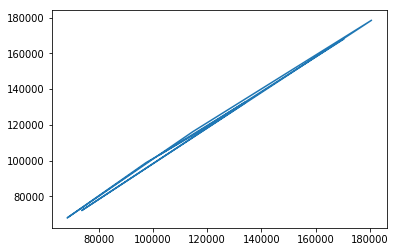

In [130]:
plt.plot(bem_y_predict,y_predict)

In [105]:
optimal_matrix = x[:,[0,1,4,5]]

OLS_obj = OLS(endog=y,exog=optimal_matrix).fit()

OLS_obj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     24.14
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.57e-09
Time:                        22:27:21   Log-Likelihood:                -577.02
No. Observations:                  50   AIC:                             1162.
Df Residuals:                      46   BIC:                             1170.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.066e+04   1.79e+04      1.156      0.254   -1.53e+04    5.66e+04
x1         -3699.6258   8033.729     -0.461      0.647   -1.99e+04    1.25e+04
x2             0.3247      0.132      2.455      0.018       0.058       0.591
x3             0.2518      0.031      8.130      0.000       0.189       0.314
==============================================================================
Omnibus:                        5.809   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.344
Skew:                          -0.481   Prob(JB):                       0.0691
Kurtosis:                       4.280   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
optimal_matrix = x[:,[0,3,4,5]]

OLS_obj = OLS(endog=y,exog=optimal_matrix).fit()

OLS_obj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           4.53e-30
Time:                        22:27:46   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
optimal_matrix = x[:,[0,1,4,5]]

OLS_obj = OLS(endog=y,exog=optimal_matrix).fit()

OLS_obj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     24.14
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.57e-09
Time:                        22:28:17   Log-Likelihood:                -577.02
No. Observations:                  50   AIC:                             1162.
Df Residuals:                      46   BIC:                             1170.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.066e+04   1.79e+04      1.156      0.254   -1.53e+04    5.66e+04
x1         -3699.6258   8033.729     -0.461      0.647   -1.99e+04    1.25e+04
x2             0.3247      0.132      2.455      0.018       0.058       0.591
x3             0.2518      0.031      8.130      0.000       0.189       0.314
==============================================================================
Omnibus:                        5.809   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.344
Skew:                          -0.481   Prob(JB):                       0.0691
Kurtosis:                       4.280   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
optimal_matrix = x[:,[0,4,5]]

OLS_obj = OLS(endog=y,exog=optimal_matrix).fit()

OLS_obj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           2.50e-10
Time:                        22:28:40   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
x1             0.3237      0.131      2.468      0.017       0.060       0.588
x2             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
optimal_matrix

array([[1.0000000e+00, 1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 1.5137759e+05, 4.4389853e+05],
       [1.0000000e+00, 1.0114555e+05, 4.0793454e+05],
       [1.0000000e+00, 1.1867185e+05, 3.8319962e+05],
       [1.0000000e+00, 9.1391770e+04, 3.6616842e+05],
       [1.0000000e+00, 9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 1.4719887e+05, 1.2771682e+05],
       [1.0000000e+00, 1.4553006e+05, 3.2387668e+05],
       [1.0000000e+00, 1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 1.0867917e+05, 3.0498162e+05],
       [1.0000000e+00, 1.1059411e+05, 2.2916095e+05],
       [1.0000000e+00, 9.1790610e+04, 2.4974455e+05],
       [1.0000000e+00, 1.2732038e+05, 2.4983944e+05],
       [1.0000000e+00, 1.3549507e+05, 2.5266493e+05],
       [1.0000000e+00, 1.5654742e+05, 2.5651292e+05],
       [1.0000000e+00, 1.2261684e+05, 2.6177623e+05],
       [1.0000000e+00, 1.2159755e+05, 2.6434606e+05],
       [1.0000000e+00, 1.4507758e+05, 2.8257431e+05],
       [1.0000000e+00, 1.141